In [0]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report 
from sklearn import tree
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
#import seaborn as sns
import matplotlib.pyplot as plt

#sns.set()

In [41]:
datam=pd.read_csv("/content/drive/My Drive/project_ckd/Chronic_Kidney_Disease/csv_result-2339.csv")
datam.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [0]:
#replacing ? with np.nan
for cols in datam:
  if cols=="id":
    pass
  else:
    datam[cols]=datam[cols].replace({"?":np.nan})

In [0]:
#change the last column name to ckd
datam=datam.rename(columns={"class":"ckd"})

In [44]:
#converting the text to integers
datam.rbc=datam.rbc.replace({"?":np.nan,"normal":1,"abnormal":0})
datam.pc=datam.pc.replace({"?":np.nan,"normal":1,"abnormal":0})
datam.pcc=datam.pcc.replace({"?":np.nan,"present":1,"notpresent":0})
datam.ba=datam.ba.replace({"?":np.nan,"present":1,"notpresent":0})
datam.htn=datam.htn.replace({"?":np.nan,"yes":1,"no":0})
datam.dm=datam.dm.replace({"?":np.nan,"yes":1,"no":0})
datam.cad=datam.cad.replace({"?":np.nan,"yes":1,"no":0})
datam.appet=datam.appet.replace({"?":np.nan,"good":1,"poor":0})
datam.ckd=datam.ckd.replace({"?":np.nan,"ckd":1,"notckd":0})

datam.pe=datam.pe.replace({"?":np.nan,"yes":1,"no":0})
datam.ane=datam.ane.replace({"?":np.nan,"yes":1,"no":0})
datam.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,ckd
0,1,48,80,1.020,1,0,NaN,1.0,0.0,0.0,121,36,1.2,NaN,NaN,15.4,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,2,7,50,1.020,4,0,NaN,1.0,0.0,0.0,NaN,18,0.8,NaN,NaN,11.3,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,3,62,80,1.010,2,3,1.0,1.0,0.0,0.0,423,53,1.8,NaN,NaN,9.6,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,4,48,70,1.005,4,0,1.0,0.0,1.0,0.0,117,56,3.8,111,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,5,51,80,1.010,2,0,1.0,1.0,0.0,0.0,106,26,1.4,NaN,NaN,11.6,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [0]:
datam.to_csv(r'/content/drive/My Drive/project_ckd/Chronic_Kidney_Disease/csv_result.csv')


In [46]:
dataq=datam
dataq

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,ckd
0,1,48,80,1.020,1,0,NaN,1.0,0.0,0.0,121,36,1.2,NaN,NaN,15.4,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,2,7,50,1.020,4,0,NaN,1.0,0.0,0.0,NaN,18,0.8,NaN,NaN,11.3,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,3,62,80,1.010,2,3,1.0,1.0,0.0,0.0,423,53,1.8,NaN,NaN,9.6,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,4,48,70,1.005,4,0,1.0,0.0,1.0,0.0,117,56,3.8,111,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,5,51,80,1.010,2,0,1.0,1.0,0.0,0.0,106,26,1.4,NaN,NaN,11.6,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55,80,1.020,0,0,1.0,1.0,0.0,0.0,140,49,0.5,150,4.9,15.7,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
396,397,42,70,1.025,0,0,1.0,1.0,0.0,0.0,75,31,1.2,141,3.5,16.5,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,398,12,80,1.020,0,0,1.0,1.0,0.0,0.0,100,26,0.6,137,4.4,15.8,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
398,399,17,60,1.025,0,0,1.0,1.0,0.0,0.0,114,50,1.0,135,4.9,14.2,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0


In [0]:
def conq(x):
  if x != x :
    pass
  else:
    return float(x)
dataq=datam.applymap(lambda x:conq(x))


In [48]:
plt.figure(figsize=(10,10))
corre=dataq.iloc[:,1:26].corr()
corre=corre.abs()
#ax = sns.heatmap(corre,xticklabels=True, yticklabels=True)


<Figure size 720x720 with 0 Axes>

In [49]:
#filling age
data_sam=dataq
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.age=data_sam_ckd.age.fillna(data_sam_ckd.age.mean())
data_sam_notckd.age=data_sam_notckd.age.fillna(data_sam_notckd.age.mean())
data_sam=data_sam_ckd.append(data_sam_notckd)
data_sam
#in the same way Every attributes null values place

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,ckd
0,1.0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3.0,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,4.0,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,5.0,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396.0,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,397.0,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,398.0,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,399.0,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [50]:
#filling bp values

print(data_sam[data_sam.bp.isna()])
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.bp=data_sam_ckd.bp.fillna(data_sam_ckd.age.mean())
data_sam_notckd.bp=data_sam_notckd.bp.fillna(data_sam_notckd.bp.mean())
data_sam=data_sam_ckd.append(data_sam_notckd)
print(data_sam[data_sam.bp.isna()])


        id   age  bp     sg   al   su  rbc  ...  htn   dm  cad  appet   pe  ane  ckd
7      8.0  24.0 NaN  1.015  2.0  4.0  1.0  ...  0.0  1.0  0.0    1.0  1.0  0.0  1.0
75    76.0   5.0 NaN  1.015  1.0  0.0  NaN  ...  0.0  0.0  0.0    1.0  0.0  1.0  1.0
132  133.0  50.0 NaN    NaN  NaN  NaN  1.0  ...  1.0  0.0  0.0    1.0  1.0  1.0  1.0
138  139.0  73.0 NaN  1.010  1.0  0.0  NaN  ...  0.0  0.0  0.0    1.0  0.0  0.0  1.0
161  162.0  62.0 NaN  1.015  3.0  0.0  0.0  ...  1.0  1.0  0.0    1.0  0.0  0.0  1.0
164  165.0  14.0 NaN  1.015  0.0  0.0  NaN  ...  0.0  1.0  0.0    0.0  1.0  0.0  1.0
185  186.0   4.0 NaN  1.020  1.0  0.0  NaN  ...  0.0  0.0  0.0    1.0  0.0  0.0  1.0
187  188.0   3.0 NaN  1.010  2.0  0.0  1.0  ...  0.0  0.0  0.0    1.0  0.0  0.0  1.0
188  189.0   8.0 NaN    NaN  NaN  NaN  NaN  ...  0.0  0.0  0.0    1.0  0.0  0.0  1.0
215  216.0   2.0 NaN  1.010  3.0  0.0  1.0  ...  0.0  0.0  0.0    1.0  1.0  0.0  1.0
293  294.0  50.0 NaN  1.020  0.0  0.0  1.0  ...  0.0  0.0  0.0   

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [51]:
print(data_sam)
data_sam_ckd=data_sam[data_sam.ckd==1.0]

data_sam_notckd=data_sam[data_sam.ckd==0.0]
data_sam_ckd.sg=data_sam_ckd.sg.fillna(data_sam_ckd.sg.mode()[0])
data_sam_notckd.sg=data_sam_notckd.sg.fillna(data_sam_notckd.sg.mode()[0])
print(data_sam_ckd)

data_sam=data_sam_ckd.append(data_sam_notckd)
print(data_sam[data_sam.sg.isna()])
data_sam.sg.mode()

        id   age    bp     sg   al   su  ...   dm  cad  appet   pe  ane  ckd
0      1.0  48.0  80.0  1.020  1.0  0.0  ...  1.0  0.0    1.0  0.0  0.0  1.0
1      2.0   7.0  50.0  1.020  4.0  0.0  ...  0.0  0.0    1.0  0.0  0.0  1.0
2      3.0  62.0  80.0  1.010  2.0  3.0  ...  1.0  0.0    0.0  0.0  1.0  1.0
3      4.0  48.0  70.0  1.005  4.0  0.0  ...  0.0  0.0    0.0  1.0  1.0  1.0
4      5.0  51.0  80.0  1.010  2.0  0.0  ...  0.0  0.0    1.0  0.0  0.0  1.0
..     ...   ...   ...    ...  ...  ...  ...  ...  ...    ...  ...  ...  ...
395  396.0  55.0  80.0  1.020  0.0  0.0  ...  0.0  0.0    1.0  0.0  0.0  0.0
396  397.0  42.0  70.0  1.025  0.0  0.0  ...  0.0  0.0    1.0  0.0  0.0  0.0
397  398.0  12.0  80.0  1.020  0.0  0.0  ...  0.0  0.0    1.0  0.0  0.0  0.0
398  399.0  17.0  60.0  1.025  0.0  0.0  ...  0.0  0.0    1.0  0.0  0.0  0.0
399  400.0  58.0  80.0  1.025  0.0  0.0  ...  0.0  0.0    1.0  0.0  0.0  0.0

[400 rows x 26 columns]
        id   age     bp     sg   al   su  ...   dm 

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0    1.01
dtype: float64

In [52]:
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.al=data_sam_ckd.al.fillna(data_sam_ckd.al.mode()[0])
data_sam_notckd.al=data_sam_notckd.al.fillna(data_sam_notckd.al.mode()[0])
data_sam=data_sam_ckd.append(data_sam_notckd)
data_sam
#filled Al values

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,ckd
0,1.0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3.0,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,4.0,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,5.0,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396.0,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,397.0,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,398.0,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,399.0,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [53]:
#filled su values
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.su=data_sam_ckd.su.fillna(data_sam_ckd.su.mode()[0])
data_sam_notckd.su=data_sam_notckd.su.fillna(data_sam_notckd.su.mode()[0])
data_sam=data_sam_ckd.append(data_sam_notckd)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [54]:
#filled rbc values
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.rbc=data_sam_ckd.rbc.fillna(data_sam_ckd.rbc.mode()[0])
data_sam_notckd.rbc=data_sam_notckd.rbc.fillna(data_sam_notckd.rbc.mode()[0])
data_sam=data_sam_ckd.append(data_sam_notckd)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [55]:
data_sam

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,ckd
0,1.0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3.0,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,4.0,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,5.0,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396.0,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,397.0,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,398.0,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,399.0,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [56]:
#filled pc values
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.pc=data_sam_ckd.pc.fillna(data_sam_ckd.pc.mode()[0])
data_sam_notckd.pc=data_sam_notckd.pc.fillna(data_sam_notckd.pc.mode()[0])
data_sam=data_sam_ckd.append(data_sam_notckd)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [57]:
#filled pcc values
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.pcc=data_sam_ckd.pcc.fillna(data_sam_ckd.pcc.mode()[0])
data_sam_notckd.pcc=data_sam_notckd.pcc.fillna(data_sam_notckd.pcc.mode()[0])
data_sam=data_sam_ckd.append(data_sam_notckd)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [58]:
#filled ba values
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.ba=data_sam_ckd.ba.fillna(data_sam_ckd.ba.mode()[0])
data_sam_notckd.ba=data_sam_notckd.ba.fillna(data_sam_notckd.ba.mode()[0])
data_sam=data_sam_ckd.append(data_sam_notckd)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [59]:
#filled bgr  values
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.bgr =data_sam_ckd.bgr.fillna(data_sam_ckd.bgr.mean())
data_sam_notckd.bgr =data_sam_notckd.bgr.fillna(data_sam_notckd.bgr.mean())
data_sam=data_sam_ckd.append(data_sam_notckd)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [60]:
#filled bu  values
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.bu =data_sam_ckd.bu.fillna(data_sam_ckd.bu.mean())
data_sam_notckd.bu =data_sam_notckd.bu.fillna(data_sam_notckd.bu.mean())
data_sam=data_sam_ckd.append(data_sam_notckd)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [61]:
#filled sc   values
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.sc =data_sam_ckd.sc.fillna(data_sam_ckd.sc.mean())
data_sam_notckd.sc =data_sam_notckd.sc.fillna(data_sam_notckd.sc.mean())
data_sam=data_sam_ckd.append(data_sam_notckd)

#filled sod   values
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.sod =data_sam_ckd.sod.fillna(data_sam_ckd.sod.mean())
data_sam_notckd.sod =data_sam_notckd.sod.fillna(data_sam_notckd.sod.mean())
data_sam=data_sam_ckd.append(data_sam_notckd)

#filled pot    values
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.pot =data_sam_ckd.pot.fillna(data_sam_ckd.pot.mean())
data_sam_notckd.pot =data_sam_notckd.pot.fillna(data_sam_notckd.pot.mean())
data_sam=data_sam_ckd.append(data_sam_notckd)

#filled hemo    values
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.hemo =data_sam_ckd.hemo.fillna(data_sam_ckd.hemo.mean())
data_sam_notckd.hemo =data_sam_notckd.hemo.fillna(data_sam_notckd.hemo.mean())
data_sam=data_sam_ckd.append(data_sam_notckd)

#filled pcv   values
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.pcv =data_sam_ckd.pcv.fillna(data_sam_ckd.pcv.mean())
data_sam_notckd.pcv =data_sam_notckd.pcv.fillna(data_sam_notckd.pcv.mean())
data_sam=data_sam_ckd.append(data_sam_notckd)

#filled wbcc   values
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.wbcc =data_sam_ckd.wbcc.fillna(data_sam_ckd.wbcc.mean())
data_sam_notckd.wbcc =data_sam_notckd.wbcc.fillna(data_sam_notckd.wbcc.mean())
data_sam=data_sam_ckd.append(data_sam_notckd)

#filled rbcc    values
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.rbcc =data_sam_ckd.rbcc.fillna(data_sam_ckd.rbcc.mean())
data_sam_notckd.rbcc =data_sam_notckd.rbcc.fillna(data_sam_notckd.rbcc.mean())
data_sam=data_sam_ckd.append(data_sam_notckd)

#filled htn    values
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.htn =data_sam_ckd.htn.fillna(data_sam_ckd.htn.mode()[0])
data_sam_notckd.htn =data_sam_notckd.htn.fillna(data_sam_notckd.htn.mode()[0])
data_sam=data_sam_ckd.append(data_sam_notckd)

#filled dm    values
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.dm =data_sam_ckd.dm.fillna(data_sam_ckd.dm.mode()[0])
data_sam_notckd.dm =data_sam_notckd.dm.fillna(data_sam_notckd.dm.mode()[0])
data_sam=data_sam_ckd.append(data_sam_notckd)

#filled cad   values
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.cad =data_sam_ckd.cad.fillna(data_sam_ckd.cad.mode()[0])
data_sam_notckd.cad =data_sam_notckd.cad.fillna(data_sam_notckd.cad.mode()[0])
data_sam=data_sam_ckd.append(data_sam_notckd)

#filled appet   values
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.appet =data_sam_ckd.appet.fillna(data_sam_ckd.appet.mode()[0])
data_sam_notckd.appet =data_sam_notckd.appet.fillna(data_sam_notckd.appet.mode()[0])
data_sam=data_sam_ckd.append(data_sam_notckd)

#filled pe    values
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.pe =data_sam_ckd.pe.fillna(data_sam_ckd.pe.mode()[0])
data_sam_notckd.pe =data_sam_notckd.pe.fillna(data_sam_notckd.pe.mode()[0])
data_sam=data_sam_ckd.append(data_sam_notckd)

#filled ane     values
data_sam_ckd=data_sam[data_sam.ckd==1]
data_sam_notckd=data_sam[data_sam.ckd==0]
data_sam_ckd.ane =data_sam_ckd.ane.fillna(data_sam_ckd.ane.mode()[0])
data_sam_notckd.ane =data_sam_notckd.ane.fillna(data_sam_notckd.ane.mode()[0])
data_sam=data_sam_ckd.append(data_sam_notckd)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [62]:
data_sam.isna().any() #gives an output showning false for every column

id       False
age      False
bp       False
sg       False
al       False
su       False
rbc      False
pc       False
pcc      False
ba       False
bgr      False
bu       False
sc       False
sod      False
pot      False
hemo     False
pcv      False
wbcc     False
rbcc     False
htn      False
dm       False
cad      False
appet    False
pe       False
ane      False
ckd      False
dtype: bool

In [63]:
print(data_sam) 

        id   age    bp     sg   al   su  ...   dm  cad  appet   pe  ane  ckd
0      1.0  48.0  80.0  1.020  1.0  0.0  ...  1.0  0.0    1.0  0.0  0.0  1.0
1      2.0   7.0  50.0  1.020  4.0  0.0  ...  0.0  0.0    1.0  0.0  0.0  1.0
2      3.0  62.0  80.0  1.010  2.0  3.0  ...  1.0  0.0    0.0  0.0  1.0  1.0
3      4.0  48.0  70.0  1.005  4.0  0.0  ...  0.0  0.0    0.0  1.0  1.0  1.0
4      5.0  51.0  80.0  1.010  2.0  0.0  ...  0.0  0.0    1.0  0.0  0.0  1.0
..     ...   ...   ...    ...  ...  ...  ...  ...  ...    ...  ...  ...  ...
395  396.0  55.0  80.0  1.020  0.0  0.0  ...  0.0  0.0    1.0  0.0  0.0  0.0
396  397.0  42.0  70.0  1.025  0.0  0.0  ...  0.0  0.0    1.0  0.0  0.0  0.0
397  398.0  12.0  80.0  1.020  0.0  0.0  ...  0.0  0.0    1.0  0.0  0.0  0.0
398  399.0  17.0  60.0  1.025  0.0  0.0  ...  0.0  0.0    1.0  0.0  0.0  0.0
399  400.0  58.0  80.0  1.025  0.0  0.0  ...  0.0  0.0    1.0  0.0  0.0  0.0

[400 rows x 26 columns]


In [64]:
#balancing dataset
data_sam["ckd"].value_counts()

1.0    250
0.0    150
Name: ckd, dtype: int64

In [0]:
data_sam=data_sam.drop(columns={'id'})

In [66]:
x=data_sam.iloc[:,0:24]
y=data_sam.iloc[:,24]
x,y

(      age    bp     sg   al   su  rbc  ...  htn   dm  cad  appet   pe  ane
 0    48.0  80.0  1.020  1.0  0.0  1.0  ...  1.0  1.0  0.0    1.0  0.0  0.0
 1     7.0  50.0  1.020  4.0  0.0  1.0  ...  0.0  0.0  0.0    1.0  0.0  0.0
 2    62.0  80.0  1.010  2.0  3.0  1.0  ...  0.0  1.0  0.0    0.0  0.0  1.0
 3    48.0  70.0  1.005  4.0  0.0  1.0  ...  1.0  0.0  0.0    0.0  1.0  1.0
 4    51.0  80.0  1.010  2.0  0.0  1.0  ...  0.0  0.0  0.0    1.0  0.0  0.0
 ..    ...   ...    ...  ...  ...  ...  ...  ...  ...  ...    ...  ...  ...
 395  55.0  80.0  1.020  0.0  0.0  1.0  ...  0.0  0.0  0.0    1.0  0.0  0.0
 396  42.0  70.0  1.025  0.0  0.0  1.0  ...  0.0  0.0  0.0    1.0  0.0  0.0
 397  12.0  80.0  1.020  0.0  0.0  1.0  ...  0.0  0.0  0.0    1.0  0.0  0.0
 398  17.0  60.0  1.025  0.0  0.0  1.0  ...  0.0  0.0  0.0    1.0  0.0  0.0
 399  58.0  80.0  1.025  0.0  0.0  1.0  ...  0.0  0.0  0.0    1.0  0.0  0.0
 
 [400 rows x 24 columns], 0      1.0
 1      1.0
 2      1.0
 3      1.0
 4      1.0
 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
# x is the train data and y is the predicted value and test size is 30% 
#remaining 70 for training

Predicted values:
[1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0.]      index  ckd
0      209  1.0
1      280  0.0
2       33  1.0
3      210  1.0
4       93  1.0
..     ...  ...
115     60  1.0
116     79  1.0
117    285  0.0
118    305  0.0
119    281  0.0

[120 rows x 2 columns]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        44
         1.0       1.00      0.99      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



[Text(111.60000000000001, 190.26, 'X[14] <= 12.95\ngini = 0.471\nsamples = 280\nvalue = [106, 174]'),
 Text(55.800000000000004, 135.9, 'gini = 0.0\nsamples = 156\nvalue = [0, 156]'),
 Text(167.4, 135.9, 'X[2] <= 1.017\ngini = 0.248\nsamples = 124\nvalue = [106, 18]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(223.20000000000002, 81.53999999999999, 'X[13] <= 3.1\ngini = 0.019\nsamples = 107\nvalue = [106, 1]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(279.0, 27.180000000000007, 'gini = 0.0\nsamples = 106\nvalue = [106, 0]')]

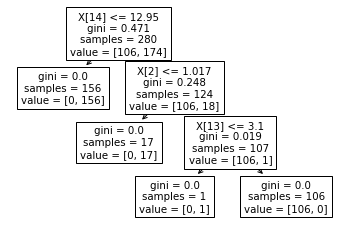

In [68]:
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100, min_samples_leaf=1,max_depth=3) 
# Performing training 
model=clf_gini.fit(X_train, y_train) 
model
y_pred = clf_gini.predict(X_test) 
print("Predicted values:") 
print(y_pred,y_test.reset_index())
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))
tree.plot_tree(model)


Predicted values:
[1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0.]      index  ckd
0      209  1.0
1      280  0.0
2       33  1.0
3      210  1.0
4       93  1.0
..     ...  ...
115     60  1.0
116     79  1.0
117    285  0.0
118    305  0.0
119    281  0.0

[120 rows x 2 columns]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        44
         1.0       1.00      0.99      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



[Text(111.60000000000001, 190.26, 'X[14] <= 12.95\nentropy = 0.957\nsamples = 280\nvalue = [106, 174]'),
 Text(55.800000000000004, 135.9, 'entropy = 0.0\nsamples = 156\nvalue = [0, 156]'),
 Text(167.4, 135.9, 'X[2] <= 1.017\nentropy = 0.598\nsamples = 124\nvalue = [106, 18]'),
 Text(111.60000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(223.20000000000002, 81.53999999999999, 'X[9] <= 154.5\nentropy = 0.076\nsamples = 107\nvalue = [106, 1]'),
 Text(167.4, 27.180000000000007, 'entropy = 0.0\nsamples = 106\nvalue = [106, 0]'),
 Text(279.0, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

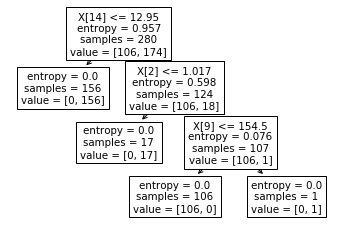

In [69]:
clf_gini = DecisionTreeClassifier(criterion = "entropy",random_state = 50,min_samples_leaf=1,max_depth=5) 
# Performing training 
model=clf_gini.fit(X_train, y_train) 
y_pred = clf_gini.predict(X_test) 
print(y_pred,y_test.reset_index())
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))
#print("acc=",accuracy_score(data_sam_impure_bp['bp'],y_pred)*100)
from sklearn import tree
tree.plot_tree(model)


In [70]:
#doing randdom forest
clf = RandomForestClassifier(max_depth=5, random_state=42)
model=clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        44
         1.0       1.00      1.00      1.00        76

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [71]:
#doing XGBoost Classifier
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)
y_pred = np.asarray([np.argmax(line) for line in preds])
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        44
         1.0       1.00      0.99      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [72]:
#doing Knn
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.86      0.71        44
         1.0       0.89      0.67      0.77        76

    accuracy                           0.74       120
   macro avg       0.75      0.77      0.74       120
weighted avg       0.79      0.74      0.75       120



In [73]:
#doing gausssian
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        44
         1.0       1.00      0.97      0.99        76

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



In [76]:
#doing svm
clf = svm.SVC()
model=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
y_test,y_pred


              precision    recall  f1-score   support

         0.0       0.52      0.27      0.36        44
         1.0       0.67      0.86      0.75        76

    accuracy                           0.64       120
   macro avg       0.60      0.56      0.55       120
weighted avg       0.62      0.64      0.61       120



(209    1.0
 280    0.0
 33     1.0
 210    1.0
 93     1.0
       ... 
 60     1.0
 79     1.0
 285    0.0
 305    0.0
 281    0.0
 Name: ckd, Length: 120, dtype: float64,
 array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
        1.]))